# Assignment 2: Reinforcement Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

#### In  the  figure  below  you  can  see  one  example  we  discussed  in  class  involving  Markov  decision processes.  Write  down  the  Bellman  equations  for  a  random  policy  you  generate  and  for  the  optimal policy  we  discussed  in  class.  

Bellman equation: $V^\pi(s) = R(s)  +  \gamma \sum \limits _{i=1} ^{n} P_\pi(s_i'|s_i)V^\pi(s_i')$, where $n$ = number of possible states

Bellman equations for optimal  policy: 
\begin{align*}
    V^\pi(s1) &= -0.02 + 0.9[(0.7 * V(Heaven)) + (0.2 * V(s1)) + (0.1 * V(s3))] \\
    V^\pi(s2) &= -0.02 + 0.9[(0.3 * V(s2)) + (0.7 * V(s3))] \\
    V^\pi(s3) &= -0.02 + 0.9[(0.7 * V(s1)) + (0.7 * V(s2)) + (0.1 * V(s4)) + (0.1 * V(s5))] \\
    V^\pi(s4) &= -0.02 + 0.9[(0.1 * V(s3)) + (0.3 * V(s4))] \\
    V^\pi(s5) &= -0.02 + 0.9[(0.7 * V(s3)) + (0.2 * V(s5)) + (0.1 * V(Hell))]
\end{align*}

Bellman equation for random  policy (where the most probable actions of $s2$ & $s4$ are "UP"): 
\begin{align*}
    V^\pi(s1) &= -0.02 + 0.9[(0.7 * V(Heaven)) + (0.2 * V(s1)) + (0.1 * V(s3))] \\
    V^\pi(s2) &= -0.02 + 0.9[(0.9 * V(s2)) + (0.1 * V(s3))] \\
    V^\pi(s3) &= -0.02 + 0.9[(0.7 * V(s1)) + (0.7 * V(s2)) + (0.1 * V(s4)) + (0.1 * V(s5))] \\
    V^\pi(s4) &= -0.02 + 0.9[(0.1 * V(s3)) + (0.9 * V(s4))] \\
    V^\pi(s5) &= -0.02 + 0.9[(0.7 * V(s3)) + (0.2 * V(s5)) + (0.1 * V(Hell))]
\end{align*}

#### Notice  that  the  arrow  below  is  pointing  East  (E)  but  it  can  also  point North (N), South(S) or West (W). Justify the idea that we have a non-zero probability to go backwards (0.1). Assume a reward of -0.02 for all states and a discount value of 0.9. 

We have a non-zero probability to go backwards due to the non-deterministic, or stochastic, nature of our world. Since our world is non-deterministic, there will always be some degree of randomness whenever we choose an action - if we are at a certain state $s$ and choose a particular action $a$, there is no guarantee that we will have the same resulting state $s'$, even if we choose the same action $a$.

#### Solve the Bellman equation for both policies.

Optimal policy:
\begin{align*}
    V^\pi(s1) &= 0.892977 \\ V^\pi(s2) &= 1.14478 \\ V^\pi(s3) &= 1.35823 \\ V^\pi(s4) &= 0.140056 \\ V^\pi(s5) &= 0.909375 \\ sum_\text{optimal} &= 4.445418
\end{align*}

Random policy:
\begin{align*}
    V^\pi(s1) &= 0.799719 \\ V^\pi(s2) &= -0.0167825 \\ V^\pi(s3) &= 0.508547 \\ V^\pi(s4) &= 0.135628 \\ V^\pi(s5) &= 0.256567 \\ sum_\text{random} &= 1.6836785
\end{align*}

## Question 2

#### Write a small python program that iterates the Bellman equation with initial values equal to zero.

First, we will find values for each state $(s1,...,s5)$ under the $optimal$ policy.

We will also simultaneously store the values of each state, from each iteration, in a dataframe.

In [4]:
### OPTIMAL POLICY

# initialize these V values to be 0, replace with each future iteration
v_heaven = 1
v_s1_opt = 0
v_s2_opt = 0
v_s3_opt = 0
v_s4_opt = 0
v_s5_opt = 0
v_hell = -1

reward = -0.02
discount = 0.9

# using probabilities for each state given s' under optimal policy
probability_next_s1_opt = np.array([0.7, 0.2, 0, 0.1, 0, 0, 0])
probability_next_s2_opt = np.array([0, 0, 0.3, 0.7, 0, 0, 0])
probability_next_s3_opt = np.array([0, 0.7, 0.7, 0, 0.1, 0.1, 0])
probability_next_s4_opt = np.array([0, 0, 0, 0.1, 0.3, 0, 0])
probability_next_s5_opt = np.array([0, 0, 0, 0.7, 0, 0.2, 0.1])

# create dataframe to store state values from each iteration 
zeros_opt = np.zeros(5)
#v_s1_opt, v_s2_opt, v_s3_opt, v_s4_opt, v_s5_opt = zeros_opt
d_opt = {'value id': ['v_s1_opt', 'v_s2_opt', 'v_s3_opt', 'v_s4_opt', 'v_s5_opt'], 'initial':zeros_opt}
vals_opt = pd.DataFrame(data=d_opt)

# start iteration
for i in np.arange(1,11):
    val_next_opt = np.array([v_heaven, v_s1_opt, v_s2_opt, v_s3_opt, v_s4_opt, v_s5_opt, v_hell])
    
    v_s1_opt = reward + discount*(np.sum(probability_next_s1_opt * val_next_opt))
    v_s2_opt = reward + discount*(np.sum(probability_next_s2_opt * val_next_opt))
    v_s3_opt = reward + discount*(np.sum(probability_next_s3_opt * val_next_opt))
    v_s4_opt = reward + discount*(np.sum(probability_next_s4_opt * val_next_opt))
    v_s5_opt = reward + discount*(np.sum(probability_next_s5_opt * val_next_opt))
    
    vals_opt[i] = [v_s1_opt, v_s2_opt, v_s3_opt, v_s4_opt, v_s5_opt]

vals_opt

,value id,initial,1,2,3,4,5,6,7,8,9,10
0,v_s1_opt,0.0,0.61,0.7180,0.769840,0.783953,0.804054,0.814466,0.827153,0.835676,0.844395,0.851009
1,v_s2_opt,0.0,-0.02,-0.0380,0.183940,0.277339,0.425476,0.513036,0.612362,0.682859,0.752182,0.806215
2,v_s3_opt,0.0,-0.02,0.3400,0.393136,0.588246,0.663742,0.783877,0.853208,0.933032,0.989088,1.044638
3,v_s4_opt,0.0,-0.02,-0.0272,0.003256,0.016261,0.037333,0.049817,0.063999,0.074069,0.083971,0.091690
4,v_s5_opt,0.0,-0.11,-0.1424,0.078568,0.151818,0.287922,0.359983,0.448639,0.508276,0.569300,0.615600


Awesome, we have a table of values as they change with each iteration under our optimal policy!

Next, we will find values for each state $(s1,...,s5)$ under the $random$ policy. We will essentially follow the same code as above; the only thing we will really alter are the probability_next arrays and some variable names.

In [6]:
### RANDOM POLICY

# initialize these V values to be 0, replace with each future iteration
v_heaven = 1
v_s1_rand = 0
v_s2_rand = 0
v_s3_rand = 0
v_s4_rand = 0
v_s5_rand = 0
v_hell = -1

reward = -0.02
discount = 0.9

# using probabilities for each state given s' under random policy
probability_next_s1_rand = np.array([0.7, 0.2, 0, 0.1, 0, 0, 0])
probability_next_s2_rand = np.array([0, 0, 0.9, 0.1, 0, 0, 0])
probability_next_s3_rand = np.array([0, 0.7, 0.7, 0, 0.1, 0.1, 0])
probability_next_s4_rand = np.array([0, 0, 0, 0.1, 0.9, 0, 0])
probability_next_s5_rand = np.array([0, 0, 0, 0.7, 0, 0.2, 0.1])

# create dataframe to store state values from each iteration 
zeros_rand = np.zeros(5)
#v_s1_rand, v_s2_rand, v_s3_rand, v_s4_rand, v_s5_rand = zeros_rand
d_rand = {'value id': ['v_s1_rand', 'v_s2_rand', 'v_s3_rand', 'v_s4_rand', 'v_s5_rand'], 'initial': zeros_rand}
vals_rand = pd.DataFrame(data=d_rand)

# start iteration
for i in np.arange(1,11):
    val_next_rand = np.array([v_heaven, v_s1_rand, v_s2_rand, v_s3_rand, v_s4_rand, v_s5_rand, v_hell])
    
    v_s1_rand = reward + discount*(np.sum(probability_next_s1_rand * val_next_rand))
    v_s2_rand = reward + discount*(np.sum(probability_next_s2_rand * val_next_rand))
    v_s3_rand = reward + discount*(np.sum(probability_next_s3_rand * val_next_rand))
    v_s4_rand = reward + discount*(np.sum(probability_next_s4_rand * val_next_rand))
    v_s5_rand = reward + discount*(np.sum(probability_next_s5_rand * val_next_rand))
    
    vals_rand[i] = [v_s1_rand, v_s2_rand, v_s3_rand, v_s4_rand, v_s5_rand]

    
vals_rand

,value id,initial,1,2,3,4,5,6,7,8,9,10
0,v_s1_rand,0.0,0.61,0.7180,0.769840,0.783866,0.792275,0.796411,0.799457,0.801760,0.803715,0.805410
1,v_s2_rand,0.0,-0.02,-0.0380,-0.020180,-0.001051,0.020327,0.040267,0.058720,0.075421,0.090489,0.104037
2,v_s3_rand,0.0,-0.02,0.3400,0.392164,0.457541,0.486687,0.512261,0.531755,0.548866,0.563790,0.577101
3,v_s4_rand,0.0,-0.02,-0.0380,-0.020180,-0.001051,0.020327,0.040267,0.058720,0.075421,0.090489,0.104037
4,v_s5_rand,0.0,-0.11,-0.1424,0.078568,0.151206,0.205468,0.233597,0.254772,0.270865,0.284541,0.296405


We now have a table of values as they change with each iteration under the random policy!

###### Printing the expected & random values for each policy, to make them easier to compare:

In [7]:
actual_optimal_summed = sum(np.array([v_s1_opt, v_s2_opt, v_s3_opt, v_s4_opt, v_s5_opt]))
expected_optimal_summed = sum(np.array([0.892977, 1.14478, 1.35823, 0.140056, 0.909375]))

actual_random_summed = sum(np.array([v_s1_rand, v_s2_rand, v_s3_rand, v_s4_rand, v_s5_rand]))
expected_random_summed = sum(np.array([0.799719, -0.0167825, 0.508547, 0.135628, 0.256567]))

print('Optimal policy')
print('Expected:', expected_optimal_summed)
print('Actual:', actual_optimal_summed)

print('   ')

print('Random policy')
print('Expected:', expected_random_summed)
print('Actual:', actual_random_summed)

Optimal policy
Expected: 4.445418
Actual: 3.4091513393714585
   
Random policy
Expected: 1.6836785
Actual: 1.8869899702304749


Let's calculate the accuracy for each policy.

In [8]:
optimal_accuracy = ((actual_optimal_summed - expected_optimal_summed) / actual_optimal_summed) * 100
random_accuracy = ((actual_random_summed - expected_random_summed) / actual_random_summed) * 100

print("Optimal policy accuracy is " + str(optimal_accuracy) + "%")
print("Random policy accuracy is " + str(random_accuracy) + "%")

Optimal policy accuracy is -30.396616561457694%
Random policy accuracy is 10.774380014624168%


It's kind of difficult to make comparisons between each policy, so let's create a visual to make it easier.

Since we created a dataframe for how each state's values changed with each iteration, let's plot those side by side and see what we get!

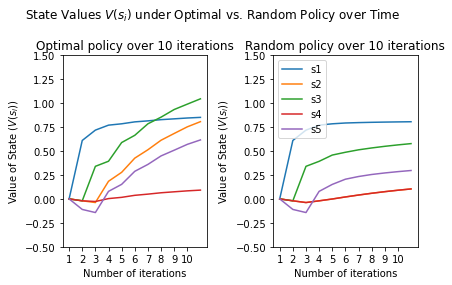

In [12]:
x = np.linspace(1, 11, num=11)
ten = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# y vals for optimal policy
y_s1_opt = np.array(pd.to_numeric(vals_opt.iloc[0,1:12]))
y_s2_opt = np.array(pd.to_numeric(vals_opt.iloc[1,1:12]))
y_s3_opt = np.array(pd.to_numeric(vals_opt.iloc[2,1:12]))
y_s4_opt = np.array(pd.to_numeric(vals_opt.iloc[3,1:12]))
y_s5_opt = np.array(pd.to_numeric(vals_opt.iloc[4,1:12]))


# y vals for random policy
y_s1_rand = np.array(pd.to_numeric(vals_rand.iloc[0,1:12]))
y_s2_rand = np.array(pd.to_numeric(vals_rand.iloc[1,1:12]))
y_s3_rand = np.array(pd.to_numeric(vals_rand.iloc[2,1:12]))
y_s4_rand = np.array(pd.to_numeric(vals_rand.iloc[3,1:12]))
y_s5_rand = np.array(pd.to_numeric(vals_rand.iloc[4,1:12]))

# create two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2) 

# optimal policy plot
ax1.plot(x, y_s1_opt)
ax1.plot(x, y_s2_opt)
ax1.plot(x, y_s3_opt)
ax1.plot(x, y_s4_opt)
ax1.plot(x, y_s5_opt)
ax1.set_title('Optimal policy over 10 iterations')



# random policy plot
ax2.plot(x, y_s1_rand)
ax2.plot(x, y_s2_rand)
ax2.plot(x, y_s3_rand)
ax2.plot(x, y_s4_rand)
ax2.plot(x, y_s5_rand)
ax2.set_title('Random policy over 10 iterations')

# create legend, axes labels
plt.legend(["s1", "s2", "s3", "s4", "s5"])
fig.suptitle('State Values $V(s_i)$ under Optimal vs. Random Policy over Time')
ax1.set(xlabel="Number of iterations", ylabel="Value of State ($V(s_i)$)")
ax2.set(xlabel="Number of iterations", ylabel="Value of State ($V(s_i)$)")
ax1.set_xticks(ticks = ten)
ax2.set_xticks(ticks = ten)
ax1.set_ylim([-0.5, 1.5])
ax2.set_ylim([-0.5, 1.5])

plt.tight_layout()
plt.show()

* Note that due to the computation of the values of s2 and s4 being the same under the random policy, only s4 is visible on the random policy graph; however, s2 also lies on this line.

#### Does this iteration converge to the random policy you set up in question 1? How about the optimal policy?

From summing up the values in the final iteration of the random policy, we can see that the iterations do not fully converge with the expected sum of the random policy that we set up in question 1. However, the final sum that we get is a lot closer to the expected sum when we use the random policy versus the optimal policy. 

From the graphs we created, we can see that the optimal policy did produce higher state values than the random policy. This validates the idea that the optimal policy in a stochastic world gives us the best chance at having the highest score.